<a href="https://colab.research.google.com/github/H1103/Class-117-Confusion-Matrix/blob/main/Class_117_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
datatoload = files.upload()

Saving heart.csv to heart.csv


Remember that we have studied the binary type of logistic regression, where the outcome is either True, or False.

In this confusion matrix, the values are as follows -

True Positives - The values that were actually True and were predicted to be True as well.

True Negatives - The values that were actually False and were predicted to be False as well.

False Positives - The values that were actually False but were predicted to be True.

False Negatives - The values that were actually True but where predicted to be False.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import csv
import pandas as pd 

df = pd.read_csv("heart.csv")
print(df.head())
"""actual_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick"]
predicted_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Sick", "Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Not Sick"]
labels = ["Not Sick", "Sick"]
cm = confusion_matrix(actual_data, predicted_data, label)
ax = plt.subplot()
sns.heatmap()"""



   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


'actual_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick", "Not Sick"]\npredicted_data = ["Not Sick", "Sick", "Not Sick", "Not Sick", "Not Sick", "Sick", "Not Sick", "Sick", "Not Sick", "Not Sick", "Sick", "Not Sick"]\nlabels = ["Not Sick", "Sick"]\ncm = confusion_matrix(actual_data, predicted_data, label)\nax = plt.subplot()\nsns.heatmap()'

In [ ]:
from sklearn.model_selection import train_test_split

age = df["age"]
heart_attack = df["target"]
age_train, age_test, heart_attack_train, heart_attack_test = train_test_split(age, heart_attack, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(age_train.ravel(), (len(age_train), 1))
Y = np.reshape(heart_attack_train.ravel(), (len(heart_attack_train), 1))

classifier = LogisticRegression(random_state = 0)
classifier.fit(X,Y)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test = np.reshape(age_test.ravel(), (len(age_test), 1))
Y_test = np.reshape(heart_attack_test.ravel(), (len(heart_attack_test), 1))

heart_attack_prediction = classifier.predict(X_test)

predicted_value = []

for i in heart_attack_prediction:
  if i == 0:
    predicted_value.append("No")
  else:
    predicted_value.append("Yes")

actual_value = []

for i in Y_test.ravel():
  if i == 0:
    actual_value.append("No")
  else:
    actual_value.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

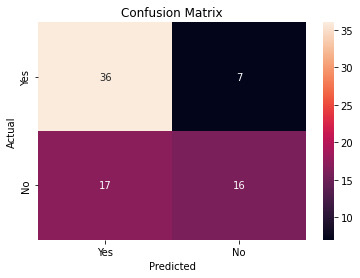

In [11]:
labels = ["Yes", "No"]
cm = confusion_matrix(actual_value, predicted_value, labels)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.preprocessing import StandardScaler

factors = df[["age", "sex", "cp", "thal", "chol"]]
heart_attack = df["target"]

factors_train, factors_test, heart_attack_train, heart_attack_test = train_test_split(factors, heart_attack, test_size = 0.25, random_state = 0)
sc_x = StandardScaler()
factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.transform(factors_test)

In [ ]:
classifier2 = LogisticRegression(random_state=0)
classifier2.fit(factors_train, heart_attack_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
heart_attack_prediction_1 = classifier2.predict(factors_test)
predicted_value_1 = []

for i in heart_attack_prediction_1:
   if i == 0:
    predicted_value_1.append("No")
   else:
    predicted_value_1.append("Yes")

actual_value_1 = []
for i in heart_attack_test.ravel():
  if i == 0:
    actual_value_1.append("No")
  else:
    actual_value_1.append("Yes")


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

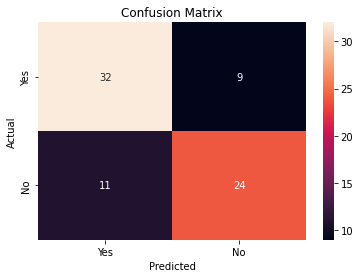

In [ ]:
cm = confusion_matrix(predicted_value_1, actual_value_1, labels)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Conclusion
This model having accuracy 73% is more accurate then the model having the accuracy of 68%.